Index(['x', 'lower_bound', 'upper_bound'], dtype='object') Index(['x', 'median_predict'], dtype='object')


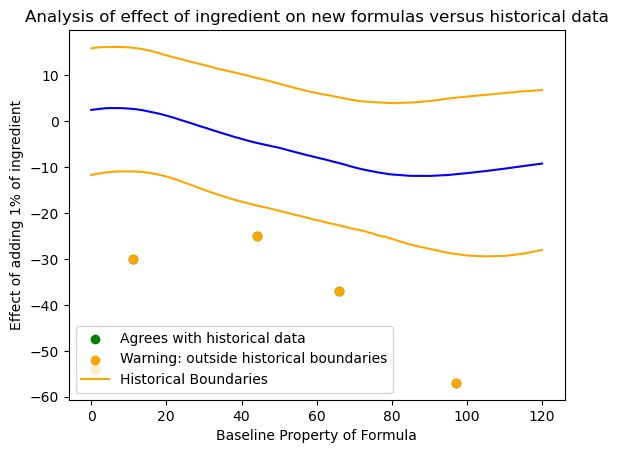

,x,y,label
0,97,-57,Warning
1,66,-37,Warning
2,44,-25,Warning
3,11,-30,Warning
4,1,-54,Warning


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the L25_boundry.csv and L25_pred.csv files
boundry_data = pd.read_csv('L25_boundry.csv')
pred_data = pd.read_csv('L25_pred.csv')


# Create new data points
# Generate random x and y values for demonstration purposes
x_values = np.random.randint(0, 121, size=5)
y_values = np.random.randint(-80, 1, size=5)

# Create the new dataframe
new_data = pd.DataFrame({'x': x_values, 'y': y_values}) #Load new data for analysis here

# Determine if the data point is below the line using interpolation
below_lower_bound = np.interp(new_data['x'], boundry_data['x'], boundry_data['lower_bound']) > new_data['y']
above_upper_bound = np.interp(new_data['x'], boundry_data['x'], boundry_data['upper_bound']) < new_data['y']

# Plot the data
plt.scatter(new_data['x'], new_data['y'], color='green', label='Agrees with historical data')
plt.scatter(new_data[below_lower_bound]['x'], new_data[below_lower_bound]['y'], color='orange', label='Warning: outside historical boundaries')
plt.plot(boundry_data['x'], boundry_data['upper_bound'], color='orange', label='Historical Boundaries')
plt.plot(boundry_data['x'], boundry_data['lower_bound'], color='orange')
plt.plot(pred_data['x'], pred_data['median_predict'], color='blue')
plt.xlabel('Baseline Property of Formula')
plt.ylabel('Effect of adding 1% of ingredient')
plt.title(f'Analysis of effect of ingredient on new formulas versus historical data')
plt.legend()
plt.show()

# Add a column to new_data df where these rows are labeled with the string 'warning'
new_data['label'] = np.where(below_lower_bound, 'Warning', '').astype(str)
new_data['label'] = np.where(above_upper_bound, 'Warning', new_data['label']).astype(str)
new_data.loc[new_data['label'] == '']= 'OK'
new_data



In [6]:
boundry_data

,x,lower_bound,upper_bound
0,0.000000,-11.702164,15.902233
1,0.898876,-11.541012,16.014946
2,1.797753,-11.404332,16.120528
3,2.696629,-11.285235,16.145540
4,3.595506,-11.193825,16.172702
...,...,...,...
95,100.000000,-29.238114,5.410923
96,105.000000,-29.433570,5.768376
97,110.000000,-29.313597,6.156107
98,115.000000,-28.840492,6.539611
